### Problem statement- To establish reletionship beetween mpg and other attributes

In [15]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [16]:
df=pd.read_csv("auto-mpg.csv")

In [17]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
89,15.0,8,318.0,150,3777,12.5,73,1,dodge coronet custom
71,19.0,3,70.0,97,2330,13.5,72,3,mazda rx2 coupe
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
351,34.4,4,98.0,65,2045,16.2,81,1,ford escort 4w
211,16.5,6,168.0,120,3820,16.7,76,2,mercedes-benz 280s
124,11.0,8,350.0,180,3664,11.0,73,1,oldsmobile omega
108,20.0,4,97.0,88,2279,19.0,73,3,toyota carina
77,22.0,4,121.0,76,2511,18.0,72,2,volkswagen 411 (sw)
255,25.1,4,140.0,88,2720,15.4,78,1,ford fairmont (man)
201,18.5,6,250.0,110,3645,16.2,76,1,pontiac ventura sj


In [18]:
df.shape

(398, 9)

In [19]:
df.dtypes  #we observe that horsepower is numeriacal but when we check data type of horsepower, it is showing object type means something is wronge with this column. for that go to exel or csv file click on horsepower column (D) then apply filter on this column we can see that ther is question mark in this column. we need to treat with this missing values


mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [20]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [21]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [22]:
df.describe(include="all")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [23]:
df["horsepower"].value_counts()

150    22
90     20
88     19
110    18
100    17
75     14
95     14
105    12
70     12
67     12
65     10
97      9
85      9
80      7
145     7
140     7
92      6
68      6
78      6
84      6
?       6
72      6
180     5
71      5
86      5
115     5
130     5
60      5
170     5
175     5
83      4
120     4
76      4
165     4
52      4
190     3
125     3
215     3
48      3
63      3
112     3
225     3
96      3
69      3
74      3
129     2
98      2
198     2
53      2
81      2
79      2
153     2
58      2
62      2
87      2
46      2
160     2
155     2
139     2
66      1
149     1
132     1
64      1
116     1
77      1
89      1
142     1
135     1
138     1
133     1
103     1
107     1
108     1
102     1
220     1
113     1
200     1
210     1
193     1
54      1
208     1
137     1
158     1
167     1
94      1
230     1
49      1
91      1
122     1
61      1
93      1
148     1
152     1
82      1
Name: horsepower, dtype: int64

In [24]:
df["horsepower"].value_counts()

150    22
90     20
88     19
110    18
100    17
75     14
95     14
105    12
70     12
67     12
65     10
97      9
85      9
80      7
145     7
140     7
92      6
68      6
78      6
84      6
?       6
72      6
180     5
71      5
86      5
115     5
130     5
60      5
170     5
175     5
83      4
120     4
76      4
165     4
52      4
190     3
125     3
215     3
48      3
63      3
112     3
225     3
96      3
69      3
74      3
129     2
98      2
198     2
53      2
81      2
79      2
153     2
58      2
62      2
87      2
46      2
160     2
155     2
139     2
66      1
149     1
132     1
64      1
116     1
77      1
89      1
142     1
135     1
138     1
133     1
103     1
107     1
108     1
102     1
220     1
113     1
200     1
210     1
193     1
54      1
208     1
137     1
158     1
167     1
94      1
230     1
49      1
91      1
122     1
61      1
93      1
148     1
152     1
82      1
Name: horsepower, dtype: int64

In [25]:
df.shape

(398, 9)

In [26]:
df=df.drop('car name',axis=1)

In [27]:
df.sample()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
152,19.0,6,225.0,95,3264,16.0,75,1


In [28]:
df["origin"]=df["origin"].replace({1:"america",2:"europe",3:"asia"})

In [29]:
df.sample()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
264,18.1,8,302.0,139,3205,11.2,78,america


In [30]:
df['horsepower']=df["horsepower"].replace('?',np.nan)

In [31]:
median1=df["horsepower"].median()

In [32]:
median1

93.5

In [33]:
df['horsepower']=df["horsepower"].replace(np.nan,median1)

In [34]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin           object
dtype: object

In [35]:
df['horsepower']=df["horsepower"].astype(float)

In [36]:
df=pd.get_dummies(df,columns=["origin"])

In [37]:
df.sample()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
319,31.3,4,120.0,75.0,2542,17.5,80,0,1,0


In [38]:
df.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower        float64
weight              int64
acceleration      float64
model year          int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

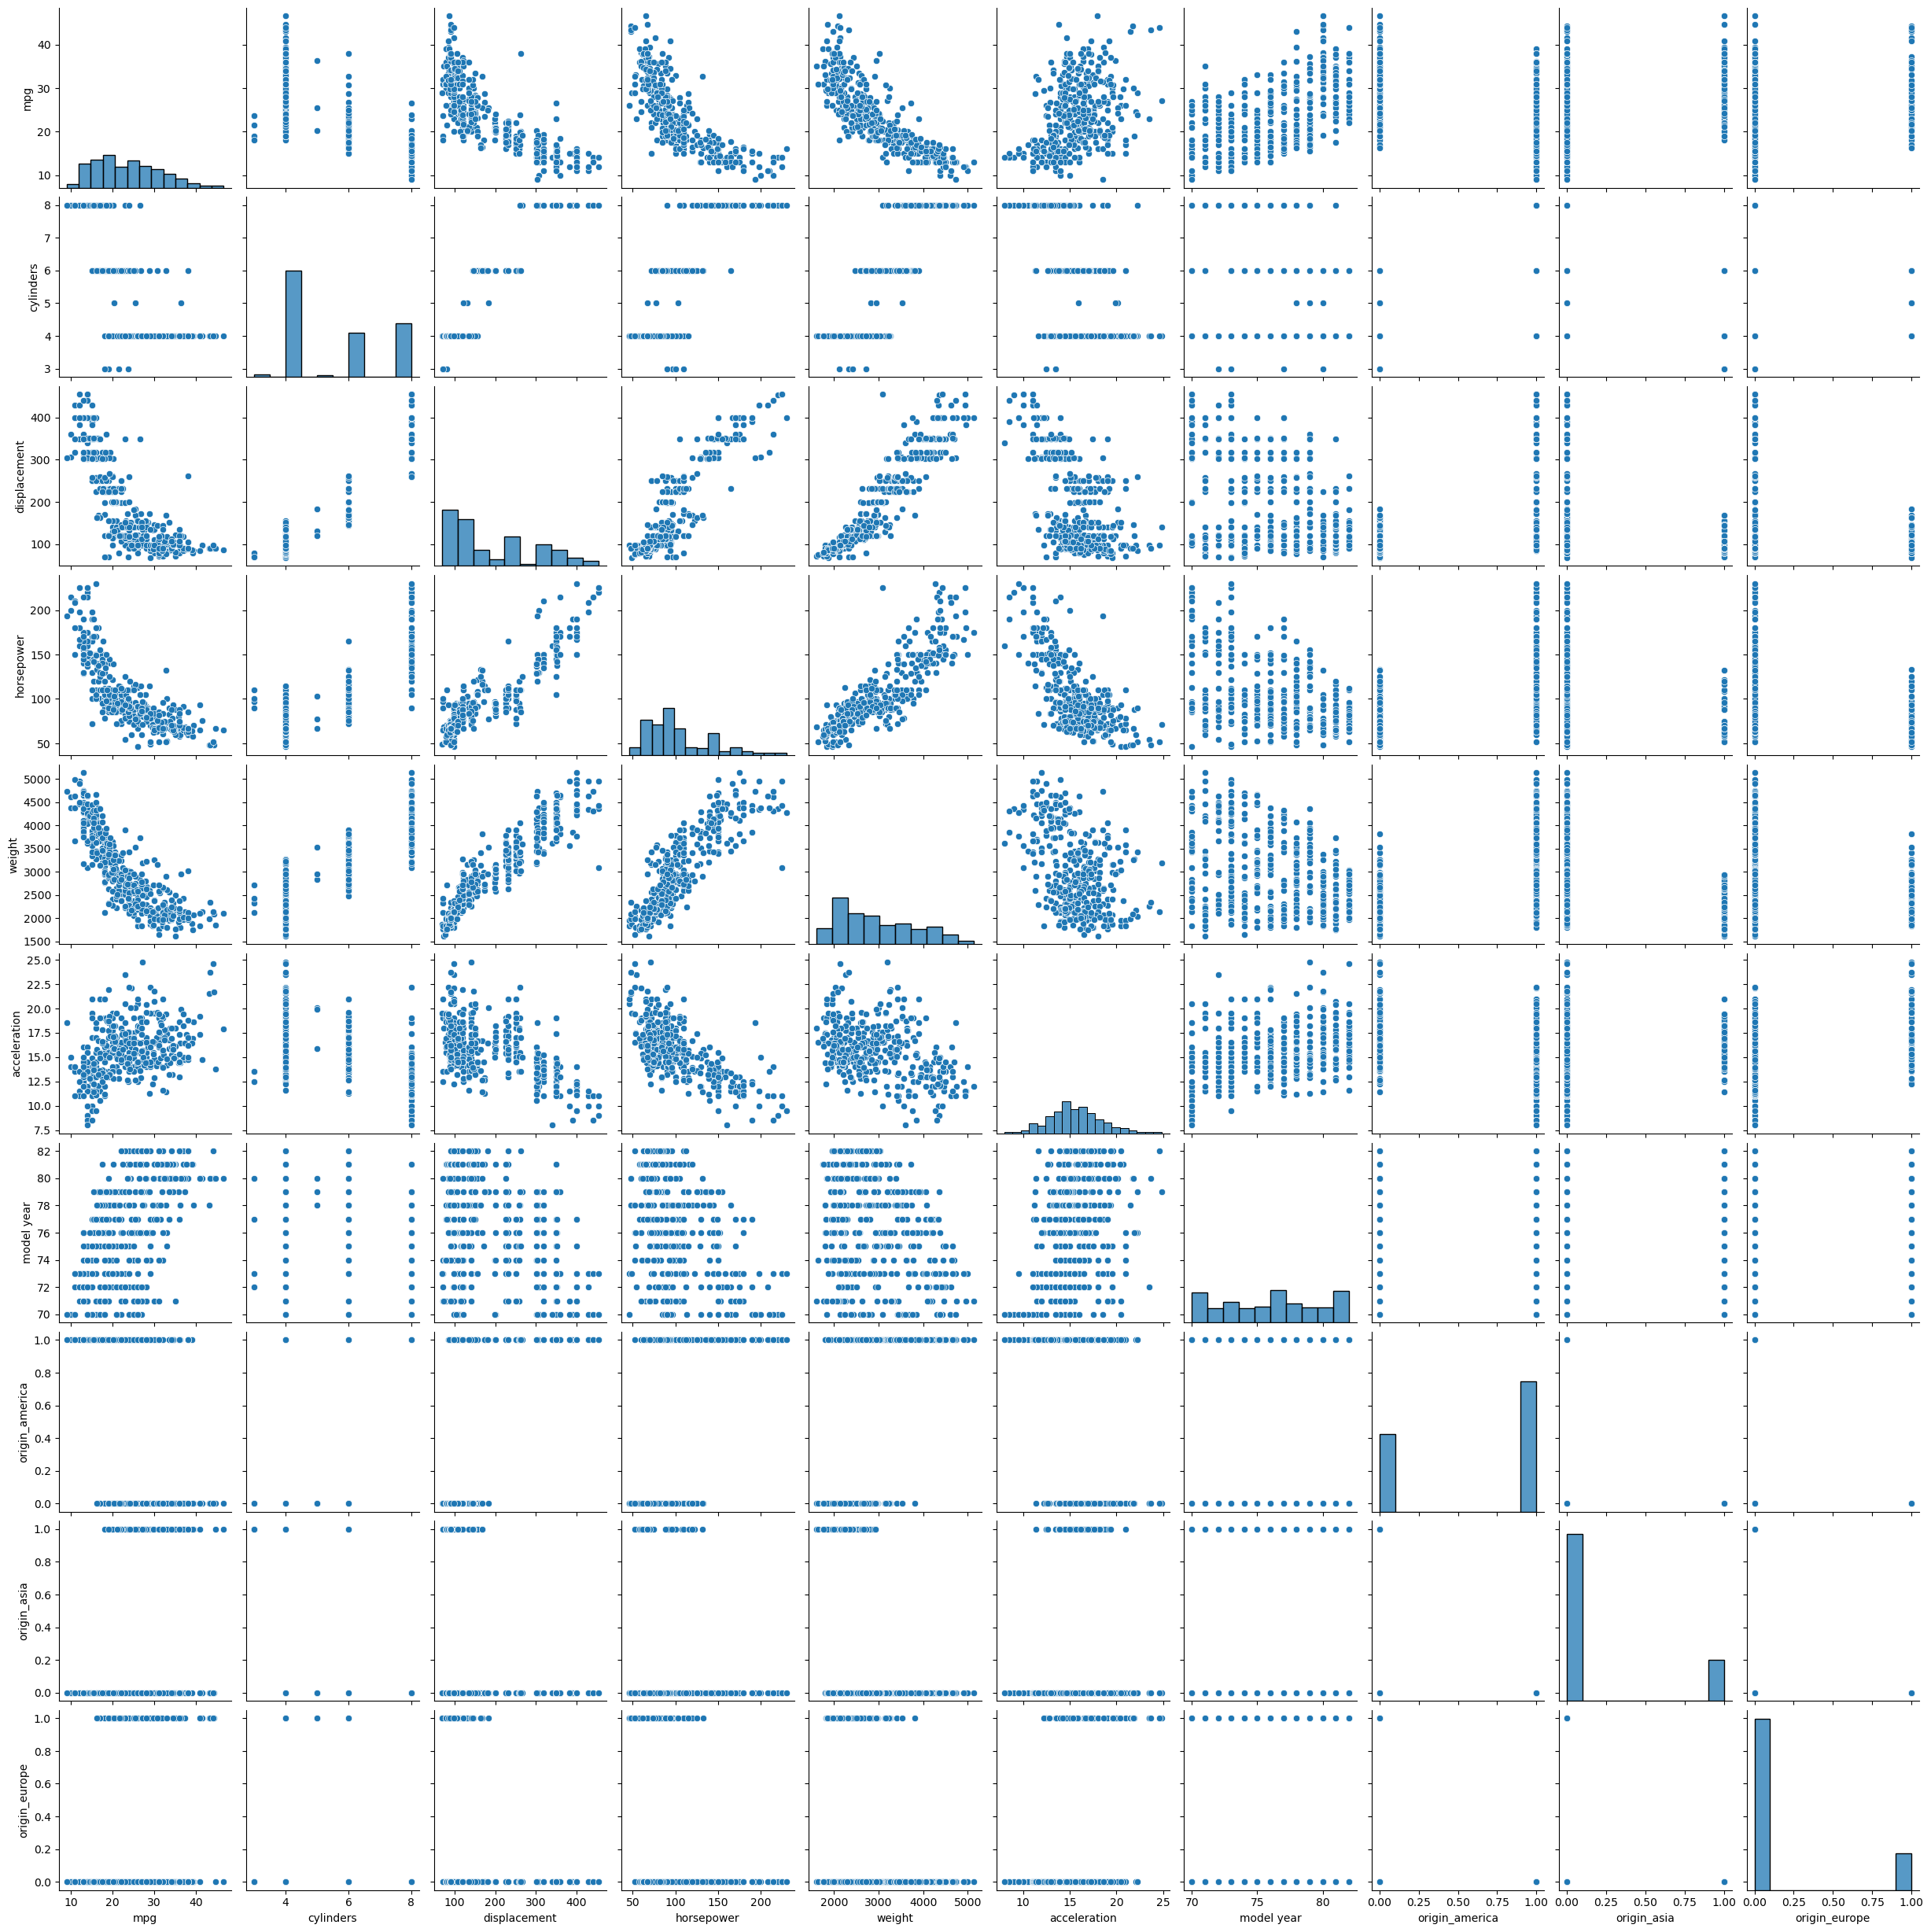

In [39]:
sns.pairplot(df)

In [40]:
### split data
Y=df["mpg"]
X=df.drop(["mpg"],axis=1)

In [41]:
### split into train ana test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [42]:
### Fit Linear model
model1=LinearRegression()

In [43]:
model1.fit(X_train,Y_train)

LinearRegression()

In [44]:
model1.score(X_train,Y_train) #score means  R^2=1-1/n sumission((y-y^)^2)/1/n sumission(y-y bar)^2   numarator is mse(mean square error)

0.8141025501610559

In [45]:
model1.score(X_test,Y_test)
###  Here score is MSE R^2 = 1-(1/n(summition(y-y cap)^2))     y cap= 3x(y-ycap)^2
### x  y    y cap    (y-y cap)^2
### 1  5    3            4
### 2 10    6            16
### 3 15    9            36
### 4 20    12           64
### 5 25    15           100
###                      220/5=   44
### If R^2 is close to 1 then that is ok 
### Difference beetween train score and test score should be 5% 
### if diff is more then 5% then model is callled overfit

0.8433135132808829

In [46]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [47]:
df=pd.read_csv("concrete.csv")

In [48]:
df.sample(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
939,312.9,160.5,0.0,177.6,9.6,916.6,759.5,28,52.45
627,387.0,20.0,94.0,157.0,13.9,938.0,845.0,3,25.51
501,339.0,0.0,0.0,185.0,0.0,1060.0,754.0,28,31.65
605,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40
800,375.0,0.0,0.0,186.0,0.0,1038.0,758.0,7,26.06
102,313.0,0.0,113.0,178.0,8.0,1002.0,689.0,28,36.80
802,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
79,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,56,39.15
714,350.0,0.0,0.0,186.0,0.0,1050.0,770.0,28,34.29
449,277.0,117.0,91.0,191.0,7.0,946.0,666.0,28,43.57


In [49]:
df.shape

(1030, 9)

In [50]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

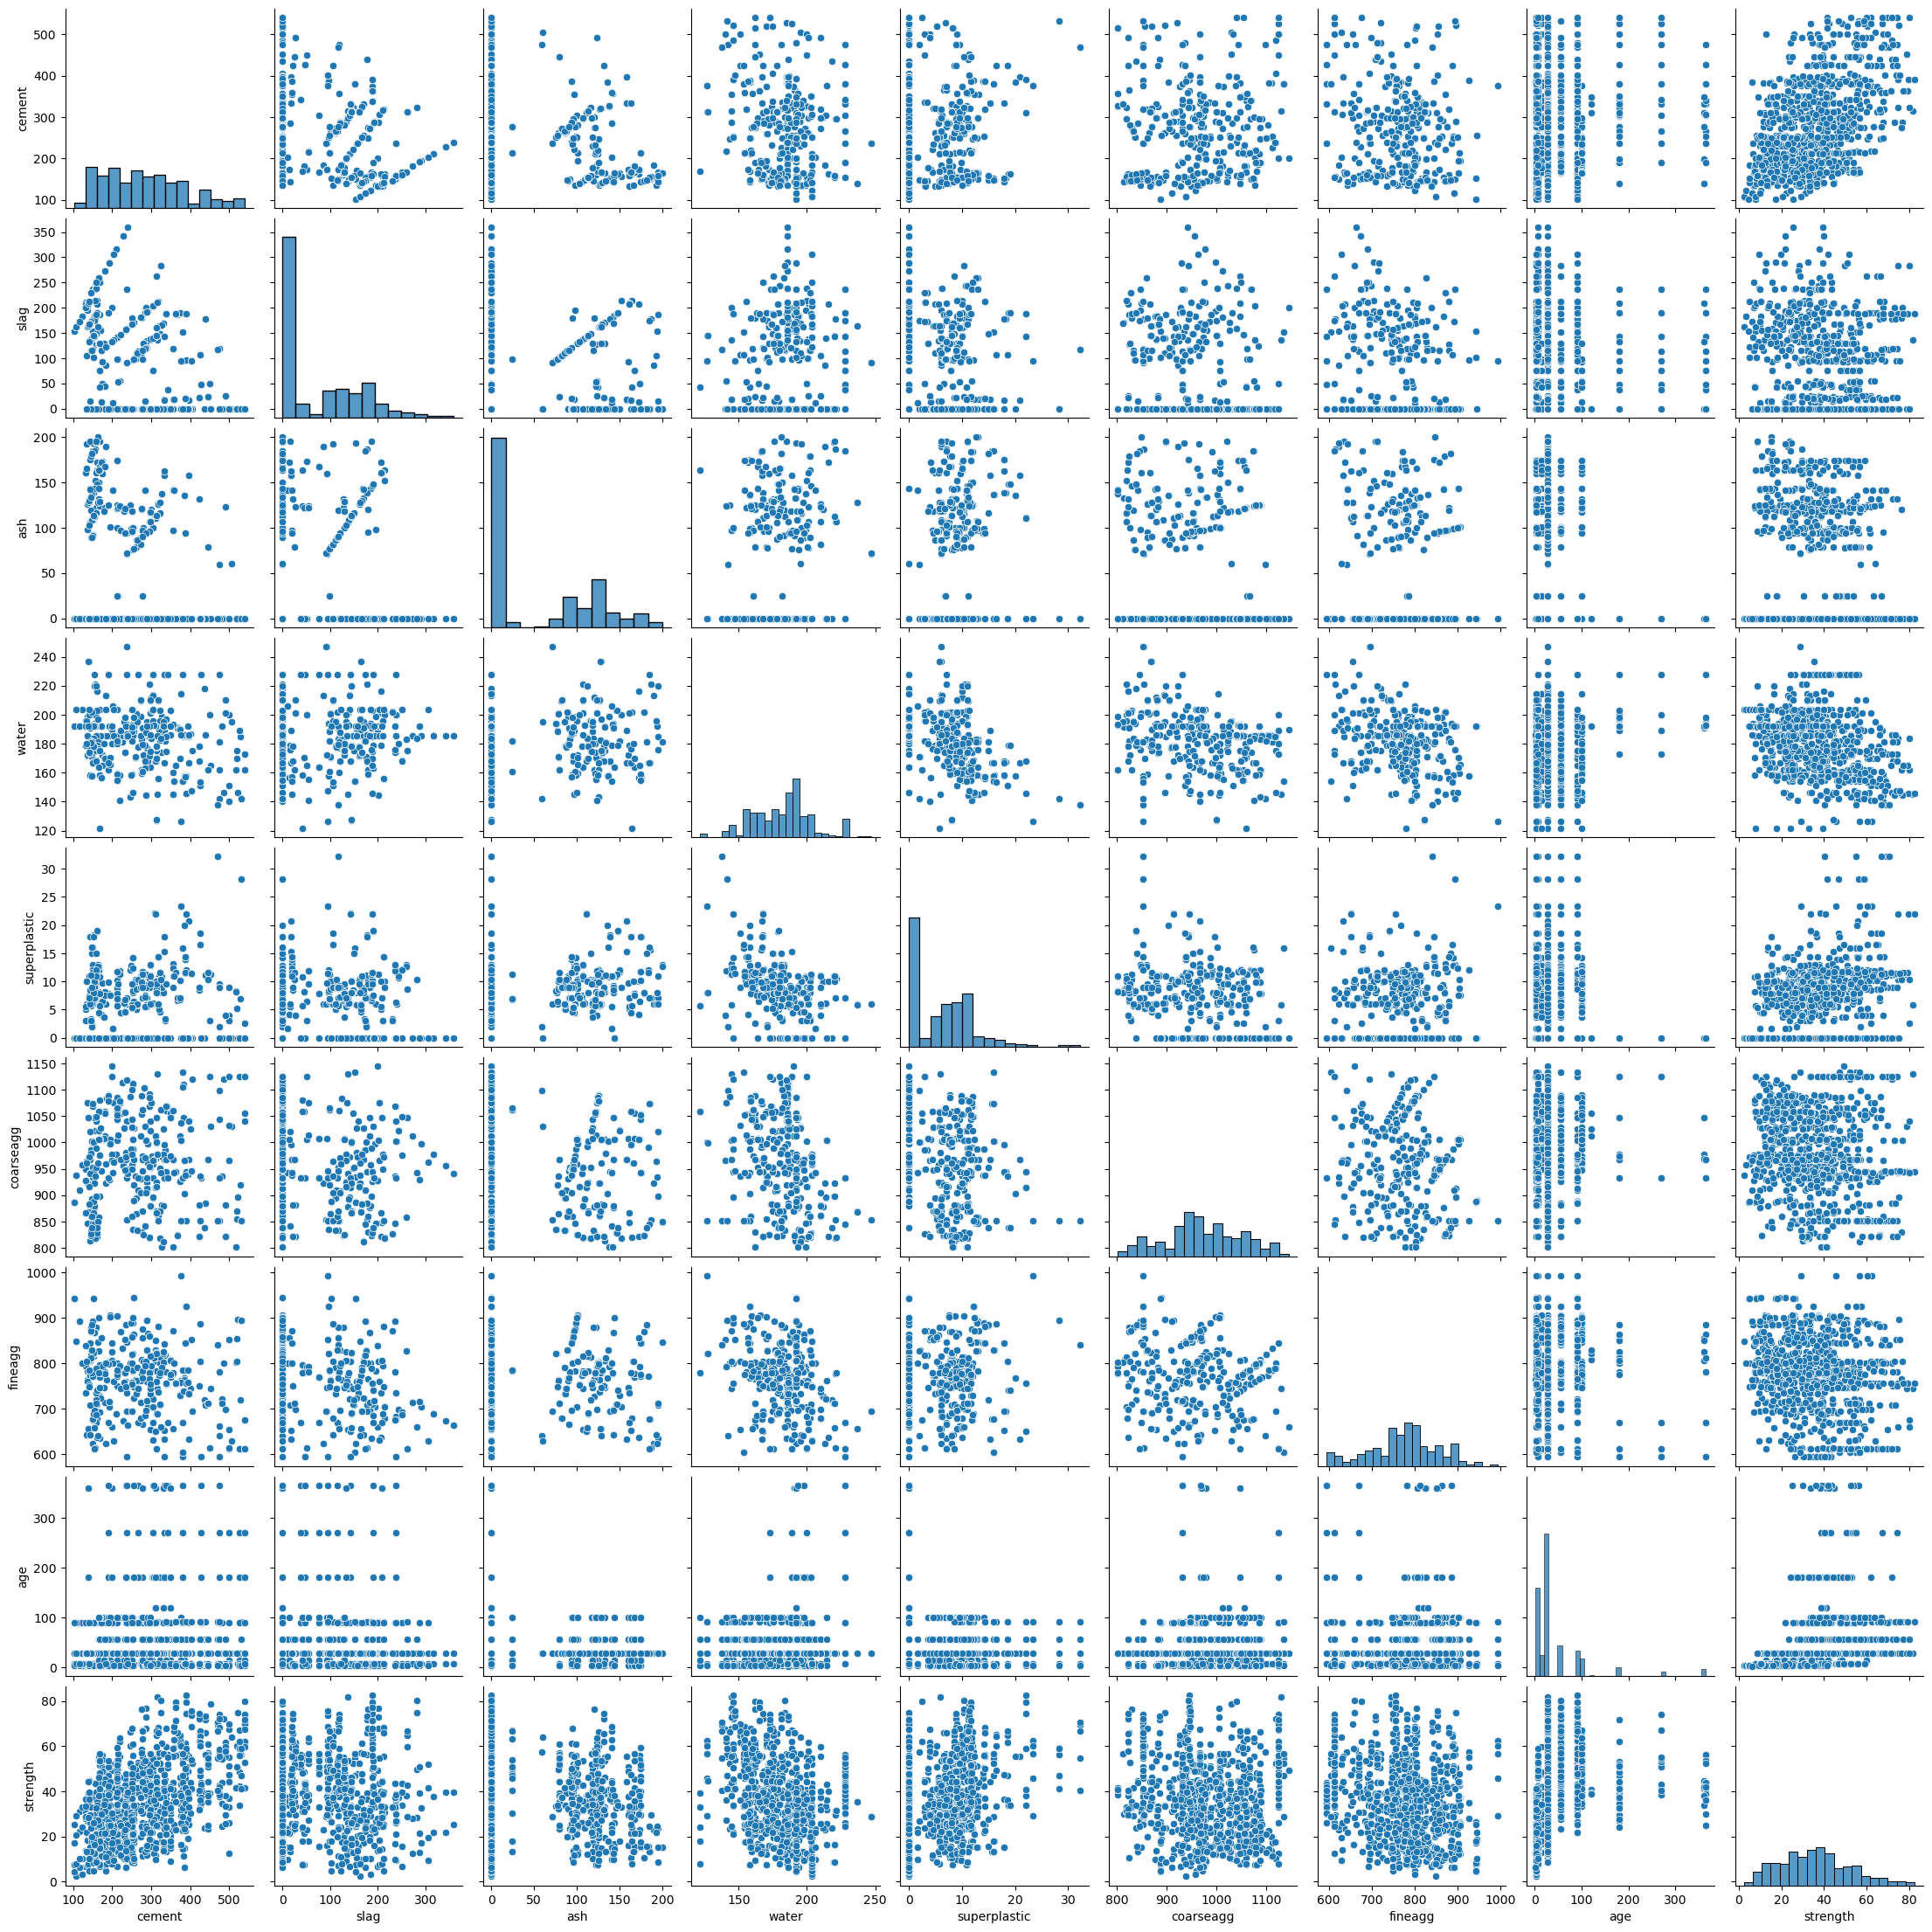

In [51]:
sns.pairplot(df)

In [52]:
### split data
Y=df["strength"]
X=df.drop(["strength"],axis=1)

In [53]:
### split into train ana test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [54]:
### Fit Linear model
model1=LinearRegression()

In [55]:
model1.fit(X_train,Y_train)

LinearRegression()

In [56]:
model1.score(X_train,Y_train) #score means  R^2=1-1/n sumission((y-y^)^2)/1/n sumission(y-y bar)^2   numarator is mse(mean square error)

0.6031487540630229

In [57]:
model1.score(X_test,Y_test)
###  Here score is MSE R^2 = 1-(1/n(summition(y-y cap)^2))     y cap= 3x(y-ycap)^2
### x  y    y cap    (y-y cap)^2
### 1  5    3            4
### 2 10    6            16
### 3 15    9            36
### 4 20    12           64
### 5 25    15           100
###                      220/5=   44
### If R^2 is close to 1 then that is ok 
### Difference beetween train score and test score should be 5% 
### if diff is more then 5% then model is callled overfit

0.6339136715208276

In [59]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [60]:
df=pd.read_csv("titanic-training-data.csv")

In [61]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C
606,607,0,3,"Karaic, Mr. Milan",male,30.0,0,0,349246,7.8958,NaN,S
343,344,0,2,"Sedgwick, Mr. Charles Frederick Waddington",male,25.0,0,0,244361,13.0000,NaN,S
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0000,B96 B98,S
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S
395,396,0,3,"Johansson, Mr. Erik",male,22.0,0,0,350052,7.7958,NaN,S
349,350,0,3,"Dimic, Mr. Jovan",male,42.0,0,0,315088,8.6625,NaN,S
190,191,1,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
468,469,0,3,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q
554,555,1,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,NaN,S


In [62]:
df.shape

(891, 12)

In [63]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [64]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [65]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [66]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [67]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [68]:
df.drop('Name',axis=1,inplace=True)

In [69]:
df.drop('Ticket',axis=1,inplace=True)

In [70]:
df.drop('Fare',axis=1,inplace=True)

In [71]:
df.drop('Cabin',axis=1,inplace=True)

In [72]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Embarked         2
dtype: int64

### Replacing misssing values

In [73]:
median1=df["Age"].median()

In [74]:
median1

28.0

In [75]:
df["Age"].replace(np.nan,median1,inplace=True)

In [76]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       2
dtype: int64

In [77]:
mode1=df["Embarked"].mode()

In [79]:
mode1

0    S
Name: Embarked, dtype: object

In [78]:
df["Embarked"].replace(np.nan,mode1,inplace=True)

ValueError: Series.replace cannot use dict-value and non-None to_replace

In [80]:
df=pd.get_dummies(df,columns=['Embarked','Sex'])

In [81]:
df.sample(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
468,469,0,3,28.0,0,0,0,1,0,0,1
566,567,0,3,19.0,0,0,0,0,1,0,1
281,282,0,3,28.0,0,0,0,0,1,0,1
683,684,0,3,14.0,5,2,0,0,1,0,1
240,241,0,3,28.0,1,0,1,0,0,1,0
200,201,0,3,28.0,0,0,0,0,1,0,1
604,605,1,1,35.0,0,0,1,0,0,0,1
51,52,0,3,21.0,0,0,0,0,1,0,1
833,834,0,3,23.0,0,0,0,0,1,0,1
834,835,0,3,18.0,0,0,0,0,1,0,1


In [82]:
### split data
Y=df["Survived"]
X=df.drop(["Survived"],axis=1)

In [83]:
### split into train ana test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [84]:
### Fit Logistic model
model1=LogisticRegression()

In [85]:
model1.fit(X_train,Y_train)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [86]:
model1.score(X_train,Y_train) #score means  R^2=1-1/n sumission((y-y^)^2)/1/n sumission(y-y bar)^2   numarator is mse(mean square error)

0.812199036918138

In [87]:
model1.score(X_test,Y_test)
###  Here score is MSE R^2 = 1-(1/n(summition(y-y cap)^2))     y cap= 3x(y-ycap)^2
### x  y    y cap    (y-y cap)^2
### 1  5    3            4
### 2 10    6            16
### 3 15    9            36
### 4 20    12           64
### 5 25    15           100
###                      220/5=   44
### If R^2 is close to 1 then that is ok 
### Difference beetween train score and test score should be 5% 
### if diff is more then 5% then model is callled overfit

0.7686567164179104